# Elmamiya/Megueye:21018

 ### creé une variable sex  avec naive_bayes

In [1]:
import pandas as pd

In [2]:
names_mr=pd.read_csv("names-mr.csv",sep=";")

In [3]:
# Renommer les colonnes du dataframe names_mr
names_mr.rename(columns={'NOMPL': "fullname", 'SEXE': "sex"}, inplace=True)

# Extraire le prénom de la colonne fullname et créer une nouvelle colonne name
names_mr['name'] = names_mr['fullname'].str.split(' ', n=1, expand=True)[0]

# Supprimer la colonne fullname
names_mr.drop(['fullname'], axis=1, inplace=True)

# Réorganiser les colonnes du dataframe pour avoir la colonne 'name' en premier
names_mr = names_mr.reindex(columns=['name','sex'])

,name,sex
0,Fatimetou,F
1,Mariem,F
2,Aicha,F
3,Nanna,F
4,Vatme,F
...,...,...
67877,Maroufa,M
67878,Muhammed,M
67879,Alieu,M
67880,Abdou,M


In [4]:
names_dataset=pd.read_csv("names_dataset.csv")


In [5]:
names=pd.concat([names_mr,names_dataset])

In [6]:
names

,name,sex,index
0,Fatimetou,F,NaN
1,Mariem,F,NaN
2,Aicha,F,NaN
3,Nanna,F,NaN
4,Vatme,F,NaN
...,...,...,...
95020,Zecharya,M,1858664.0
95021,Ziheng,M,1858676.0
95022,Ziyu,M,1858679.0
95023,Zykir,M,1858686.0


In [7]:
names.isnull().sum()

name         0
sex          0
index    67882
dtype: int64

In [8]:
names['sex'].replace(['F','M'],[0,1],inplace=True)

names

,name,sex,index
0,Fatimetou,0,NaN
1,Mariem,0,NaN
2,Aicha,0,NaN
3,Nanna,0,NaN
4,Vatme,0,NaN
...,...,...,...
95020,Zecharya,1,1858664.0
95021,Ziheng,1,1858676.0
95022,Ziyu,1,1858679.0
95023,Zykir,1,1858686.0


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer

In [10]:
Xfeatures = names['name']
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [11]:
from sklearn.model_selection import train_test_split
y = names.sex

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7607852284725121

In [13]:
my_name = ["mamiya"]
vect = cv.transform(my_name).toarray()
clf.predict(vect)

array([0], dtype=int64)

In [14]:
df=pd.read_csv("C:/Users/hp/Desktop/datachallange/train_set.csv/train_set.csv")

In [15]:
df.shape

(23894, 21)

In [16]:
print(df.nunique())

Unnamed: 0        23894
Nom               23651
Serie,x               5
GroupeAnonymat       24
LieuNaissance       512
Centre              137
Etablissement       360
moyeneGeneral      5256
Decision              6
Note1               169
Note2               181
Note3               172
Note4               784
Note5               716
Note6               759
Note7               809
Note8                59
Willaya              15
moughataa            48
DateNaissance      5925
ID                23894
dtype: int64


In [17]:
ar_to_fr = {
    'يناير': 'Janvier',
    'فبراير': 'Février',
    'مارس': 'Mars',
    'ابريل': 'Avril',
    'مايو': 'Mai',
    'يونيو': 'Juin',
    'يوليو': 'Juillet',
    'اغسطس': 'Août',
    'سبتمبر': 'Septembre',
    'أكتوبر': 'Octobre',
    'نوفمبر': 'Novembre',
    'ديسمبر': 'Décembre'
}

def convert_month(month):
    for ar, fr in ar_to_fr.items():
        if ar in month:
            return month.replace(ar, fr)
    return month


In [18]:
df['DateNaissance'] = df['DateNaissance'].apply(convert_month)

In [19]:
df['DateNaissance'].head()

0    12 Décembre 1998
1    26 Décembre 1991
2          8 Mai 1995
3        24 avr. 1999
4         10 mai 2001
Name: DateNaissance, dtype: object

In [20]:
# Extraire l'année à partir de la colonne DateNaissance
df['annee_naissance'] = df['DateNaissance'].str.extract('(\d{4})')

In [21]:
df["annee_naissance"] = df["annee_naissance"].astype(int)
annee_actuelle = 2022
df['age'] = annee_actuelle - df['annee_naissance']


In [22]:
df['age'].head()

0    24
1    31
2    27
3    23
4    21
Name: age, dtype: int32

In [23]:
df['annee_naissance'].head()

0    1998
1    1991
2    1995
3    1999
4    2001
Name: annee_naissance, dtype: int32

In [24]:
df['prenom'] = df['Nom'].str.split(' ', n=1, expand=True)[0]

In [25]:
df['Nom']=df['Nom'].str.split('\n', n=1, expand=True)
# Convertir les prénoms et noms de famille en minuscules
df['Nom'].str.lower()
df['prenom'].str.lower()

0              el
1          mariem
2           aiche
3           ahmed
4          mariam
           ...   
23889      cheikh
23890        ebou
23891       nouha
23892       oumou
23893    aminetou
Name: prenom, Length: 23894, dtype: object

In [26]:
T=[]
for a in df['prenom']:
    L=[]
    L.append(a)
    my_name=L
    vect = cv.transform(my_name).toarray()
    l=clf.predict(vect)[0]
    T.append(l)

In [27]:
for a in range(len(T)):
    if T[a]==0:
        T[a]="F"
    else:
        T[a]="M"
    

In [28]:
df['sex']=T

In [29]:
df.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note7,Note8,Willaya,moughataa,DateNaissance,ID,annee_naissance,age,prenom,sex
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,7.50,18.5,Nouakchott 2 (Ouest),KSAR,12 Décembre 1998,ID_27634,1998,24,El,M
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,26 Décembre 1991,ID_36311,1991,31,Mariem,F
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,10.00,17.0,Inchiri,AKJOUJT,8 Mai 1995,ID_21059,1995,27,Aiche,F
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,24 avr. 1999,ID_24532,1999,23,Ahmed,M
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,10 mai 2001,ID_17861,2001,21,Mariam,F


In [30]:
## X = df[['Serie,x', 'GroupeAnonymat', 'LieuNaissance', 'Centre', 'Etablissement', 'Willaya', 'moughataa', 'DateNaissance','sex','age','ID']]

In [31]:
df.isnull().sum()

Unnamed: 0         0
Nom                0
Serie,x            0
GroupeAnonymat     0
LieuNaissance      0
Centre             0
Etablissement      0
moyeneGeneral      0
Decision           0
Note1              0
Note2              0
Note3              0
Note4              0
Note5              0
Note6              0
Note7              0
Note8              0
Willaya            0
moughataa          0
DateNaissance      0
ID                 0
annee_naissance    0
age                0
prenom             0
sex                0
dtype: int64

In [32]:

# Obtenir les différentes modalités de la colonne "x"
modalites = df['Serie,x'].unique()

In [33]:
modalites

array(['SN', 'LO', 'LM', 'M', 'TM'], dtype=object)

In [34]:
import seaborn as sns

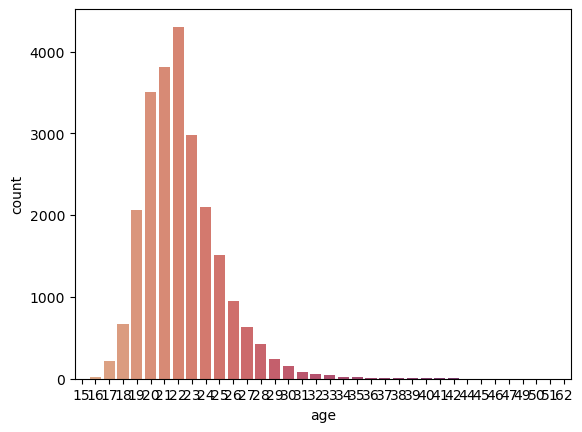

In [35]:
#Checking The Age Column
import matplotlib.pyplot as plt
sns.countplot(x=df['age'], palette='flare')
plt.show()

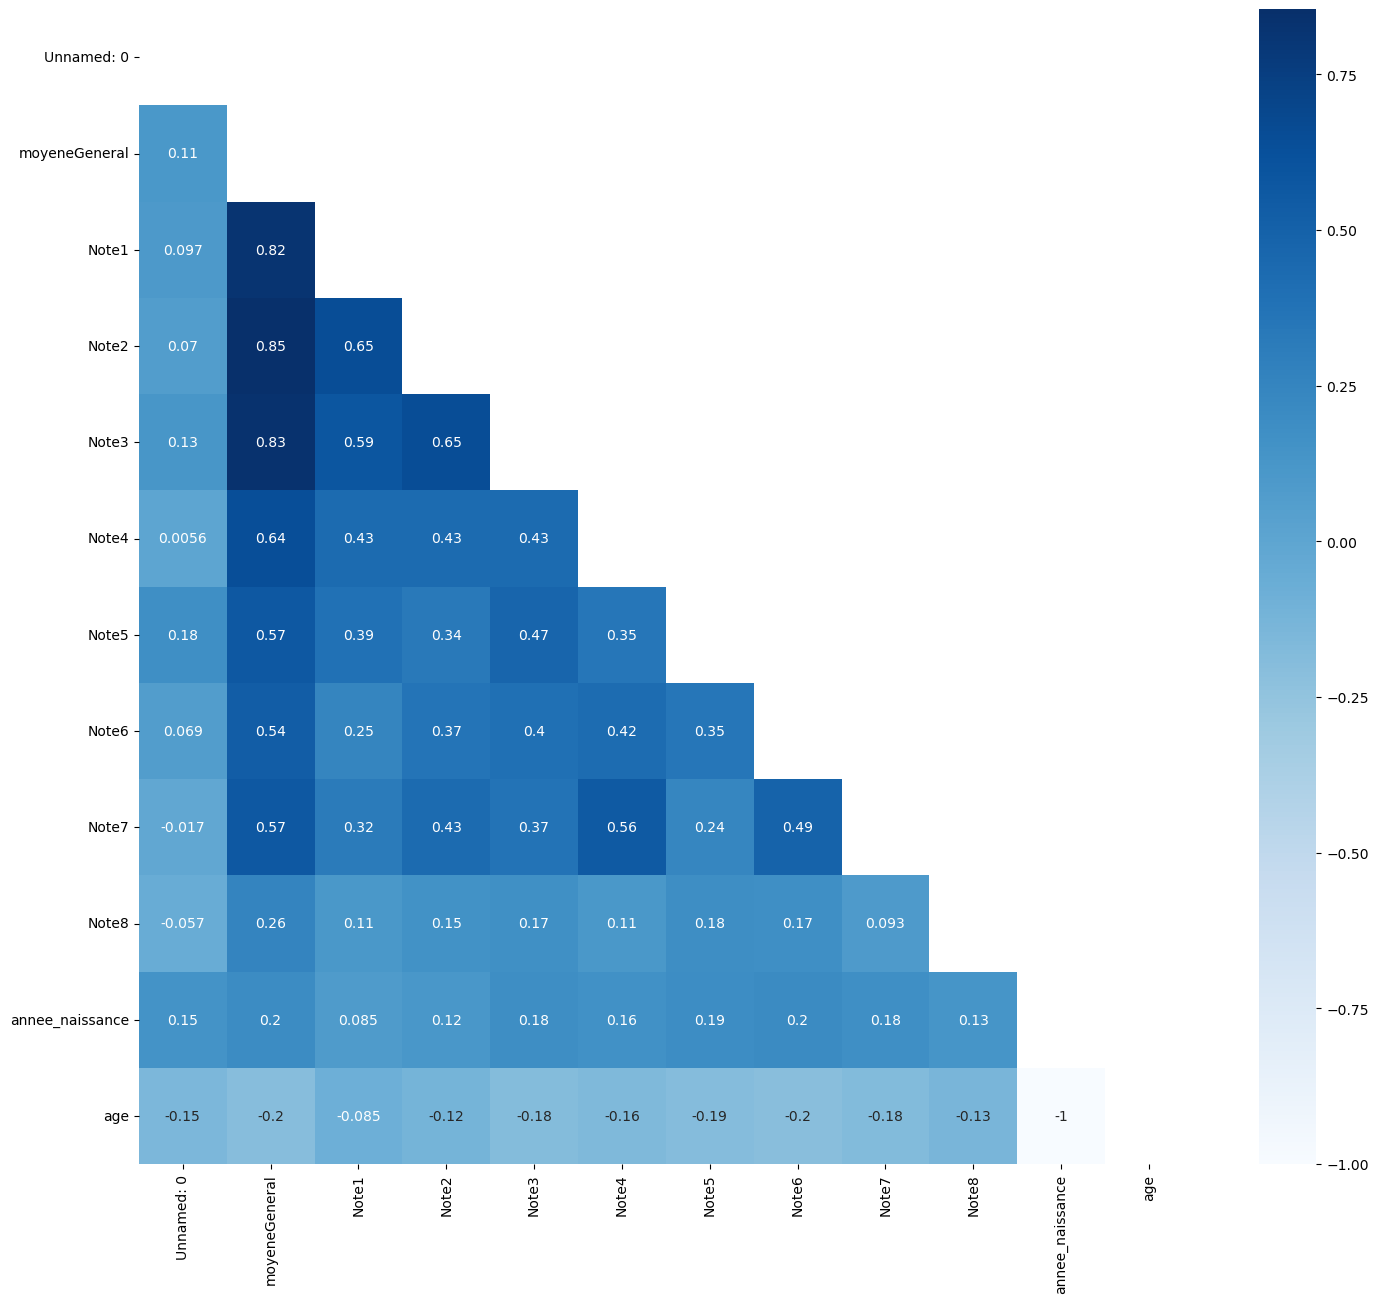

In [36]:
#Looking For A Correlation
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(17, 15))
corr_mask = np.triu(df.corr())
h_map = sns.heatmap(df.corr(), mask=corr_mask, annot=True, cmap='Blues')
plt.yticks(rotation=360)
plt.xticks(rotation=90)
plt.show()

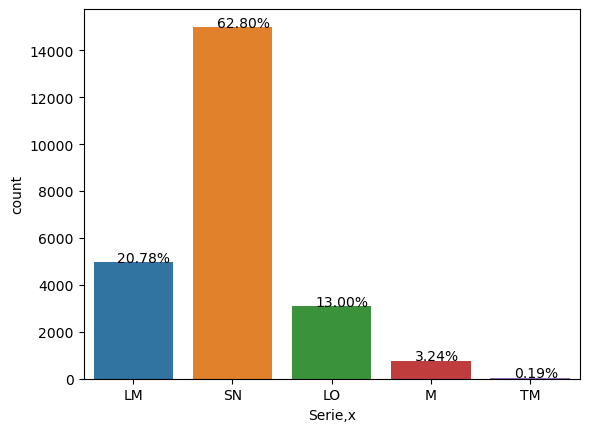

In [37]:
ax = sns.countplot(x='Serie,x', data=df, order=['LM', 'SN', 'LO','M','TM'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(df)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

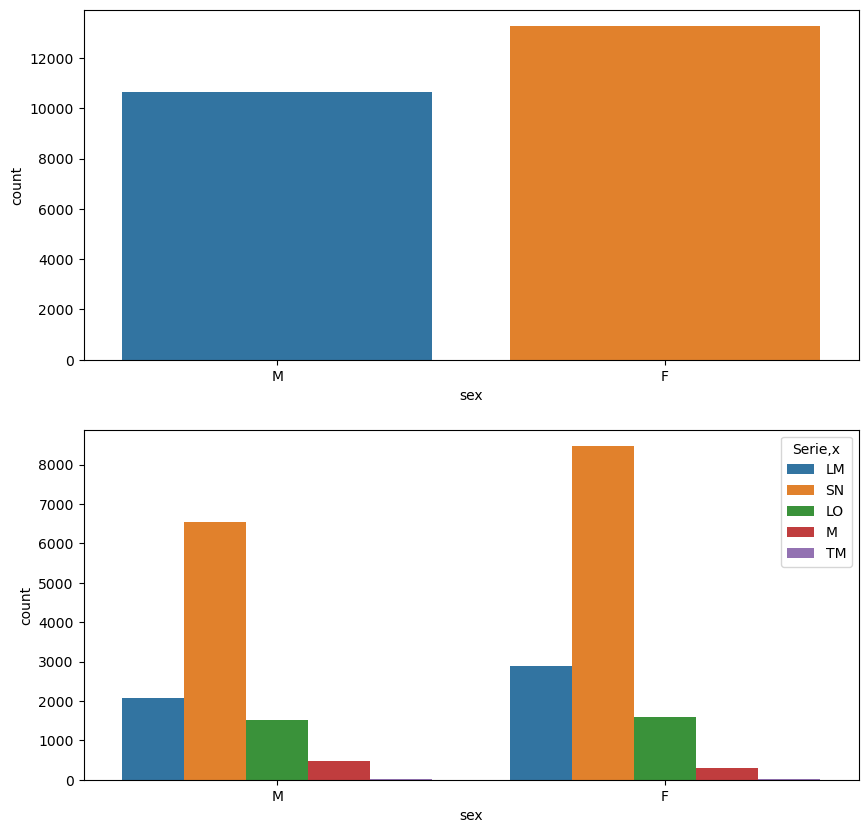

In [38]:
fig, axarr  = plt.subplots(2,figsize=(10,10))
sns.countplot(x='sex', data=df, order=['M','F'], ax=axarr[0])
sns.countplot(x='sex', hue='Serie,x', data=df, order=['M', 'F'],hue_order = ['LM', 'SN', 'LO','M','TM'], ax=axarr[1])
plt.show()

In [39]:
df['DateNaissance'] = df['DateNaissance'].apply(lambda x: x.split(' ')[-1])
df.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note7,Note8,Willaya,moughataa,DateNaissance,ID,annee_naissance,age,prenom,sex
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,7.50,18.5,Nouakchott 2 (Ouest),KSAR,1998,ID_27634,1998,24,El,M
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,1991,ID_36311,1991,31,Mariem,F
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,10.00,17.0,Inchiri,AKJOUJT,1995,ID_21059,1995,27,Aiche,F
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,1999,ID_24532,1999,23,Ahmed,M
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,2001,ID_17861,2001,21,Mariam,F


In [40]:
test_data=pd.read_csv("C:/Users/hp/Downloads/test_set.csv")

In [41]:
test_data.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,ID,prediction
0,6,Mohamed Hama Ahmed Lely,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,15 يوليو 2001,ID_6,NaN
1,15,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,12 août 1999,ID_15,NaN
2,18,El Alye Cheikh Ahmed Maihmatt,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,18 sept. 1999,ID_18,NaN
3,19,Haine Mohamed Lemin Telba,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,24 août 1998,ID_19,NaN
4,20,Aichata Sid'Ahmed Ahmed Ely,SN,SN09,El Megve,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,31-mai-95,ID_20,NaN


In [42]:
import re
pattern = re.compile(r'\b\d{4}\b')
test_data['DateNaissance'] = df['DateNaissance'].astype(str)
# Appliquer l'expression régulière à chaque valeur de la colonne
test_data['annee_naissance'] = test_data['DateNaissance'].apply(lambda x: pattern.findall(x)[0])
test_data.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,ID,prediction,annee_naissance
0,6,Mohamed Hama Ahmed Lely,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1998,ID_6,NaN,1998
1,15,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1991,ID_15,NaN,1991
2,18,El Alye Cheikh Ahmed Maihmatt,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1995,ID_18,NaN,1995
3,19,Haine Mohamed Lemin Telba,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1999,ID_19,NaN,1999
4,20,Aichata Sid'Ahmed Ahmed Ely,SN,SN09,El Megve,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,2001,ID_20,NaN,2001


In [43]:
df.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note7,Note8,Willaya,moughataa,DateNaissance,ID,annee_naissance,age,prenom,sex
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,7.50,18.5,Nouakchott 2 (Ouest),KSAR,1998,ID_27634,1998,24,El,M
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,1991,ID_36311,1991,31,Mariem,F
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,10.00,17.0,Inchiri,AKJOUJT,1995,ID_21059,1995,27,Aiche,F
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,1999,ID_24532,1999,23,Ahmed,M
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,2001,ID_17861,2001,21,Mariam,F


In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
test_data.shape

(15930, 13)

In [46]:
test_data['prenom'] = test_data['Nom'].str.split(' ', n=1, expand=True)[0]

In [47]:
test_data['Nom']=test_data['Nom'].str.split('\n', n=1, expand=True)
# Convertir les prénoms et noms de famille en minuscules
test_data['Nom'].str.lower()
test_data['prenom'].str.lower()

0          mohamed
1        fatimatou
2               el
3            haine
4          aichata
           ...    
15925     djeinaba
15926       magatt
15927     zeinebou
15928    hajeratou
15929      dienaba
Name: prenom, Length: 15930, dtype: object

In [48]:
T=[]
for a in test_data['prenom']:
    L=[]
    L.append(a)
    my_name=L
    vect = cv.transform(my_name).toarray()
    l=clf.predict(vect)[0]
    T.append(l)

In [49]:
for a in range(len(T)):
    if T[a]==0:
        T[a]="F"
    else:
        T[a]="M"
    

In [50]:
test_data['sex']=T

In [51]:
test_data.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,DateNaissance,ID,prediction,annee_naissance,prenom,sex
0,6,Mohamed Hama Ahmed Lely,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1998,ID_6,NaN,1998,Mohamed,M
1,15,Fatimatou Mohamed Sid Abbe,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1991,ID_15,NaN,1991,Fatimatou,F
2,18,El Alye Cheikh Ahmed Maihmatt,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1995,ID_18,NaN,1995,El,M
3,19,Haine Mohamed Lemin Telba,SN,SN09,Vassala,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,1999,ID_19,NaN,1999,Haine,F
4,20,Aichata Sid'Ahmed Ahmed Ely,SN,SN09,El Megve,Lycée Vassala,Lycée Vassala,Hod Charghy,BASSEKNOU,2001,ID_20,NaN,2001,Aichata,F


In [52]:
test_data['DateNaissance'].head()

0    1998
1    1991
2    1995
3    1999
4    2001
Name: DateNaissance, dtype: object

In [53]:
ar_to_fr = {
    'يناير': 'Janvier',
    'فبراير': 'Février',
    'مارس': 'Mars',
    'ابريل': 'Avril',
    'مايو': 'Mai',
    'يونيو': 'Juin',
    'يوليو': 'Juillet',
    'اغسطس': 'Août',
    'سبتمبر': 'Septembre',
    'أكتوبر': 'Octobre',
    'نوفمبر': 'Novembre',
    'ديسمبر': 'Décembre'
}

def convert_month(month):
    for ar, fr in ar_to_fr.items():
        if ar in month:
            return month.replace(ar, fr)
    return month


In [54]:
test_data['DateNaissance'] = test_data['DateNaissance'].apply(convert_month)

In [55]:
test_data['DateNaissance'].head(10)

0    1998
1    1991
2    1995
3    1999
4    2001
5    2000
6    2000
7    2002
8    2000
9    2002
Name: DateNaissance, dtype: object

In [56]:
# Extraire l'année à partir de la colonne DateNaissance
test_data['annee_naissance'] = test_data['DateNaissance'].str.extract('(\d{4})')

In [57]:
test_data['annee_naissance'].head()

0    1998
1    1991
2    1995
3    1999
4    2001
Name: annee_naissance, dtype: object

In [58]:
# calculate the mean of known birth years
mean_birth_year = test_data['annee_naissance'].dropna().astype(int).mean()

# replace NaN values with the mean
test_data['annee_naissance'].fillna(mean_birth_year, inplace=True)


In [59]:
test_data['annee_naissance'].head()

0    1998
1    1991
2    1995
3    1999
4    2001
Name: annee_naissance, dtype: object

In [60]:
test_data['annee_naissance'] = test_data['annee_naissance'].astype(int)

In [61]:
test_data["annee_naissance"] = test_data["annee_naissance"].astype(int)
annee_actuelle = 2022
test_data['age'] = annee_actuelle - test_data['annee_naissance']

In [62]:
test_data['age'].head()

0    24
1    31
2    27
3    23
4    21
Name: age, dtype: int32

In [84]:

# Sélection des caractéristiques (features) et la variable cible (target)
categorical_features = ['Etablissement', 'Serie,x', 'moughataa', 'Centre', 'Willaya', 'DateNaissance', 'sex']
target = 'Decision'

# Concaténation des ensembles d'entraînement et de test
all_data = pd.concat([df[categorical_features], test_data[categorical_features]], axis=0)

# Prétraitement des variables catégorielles
cat_transformer = OneHotEncoder(handle_unknown='ignore')
cat_transformer.fit(all_data)

# Séparation des données en ensembles d'entraînement et de test encodés
X_train_encoded = cat_transformer.transform(df[categorical_features])
X_test_encoded = cat_transformer.transform(test_data[categorical_features])
y_train = df[target]
y_test = test_data[target]

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train a gradient boosting model on the preprocessed training data
model = GradientBoostingClassifier()
model.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed test data
y_pred = model.predict(X_test_encoded)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

from sklearn.model_selection import GridSearchCV

# Define the gradient boosting model
model = GradientBoostingClassifier()

# Define the hyperparameters to search
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 1.0]}

# Define the grid search object
grid_search = GridSearchCV(model, param_grid, cv=5)

# Fit the grid search object on the preprocessed training data
grid_search.fit(X_train_encoded, y_train)

# Make predictions on the preprocessed test data using the best model from the grid search
y_pred = grid_search.predict(X_test_encoded)

# Evaluate the performance of the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9866290018832392
Accuracy: 0.9863151286880101


In [ ]:
# Faire la prédiction sur le nouveau jeu de données
y_pred = model.predict(X_test_encoded)

# Ajouter la prédiction en tant que colonne "Decision" dans le nouveau jeu de données
test_data['Decision'] = y_pred

# Ajouter la probabilité que la décision soit "Admis" dans le nouveau jeu de données
y_prob = model.predict_proba(X_test_encoded)
test_data['predicted'] = y_prob[:,1]

In [ ]:
f=pd.read_csv("C:/Users/hp/Downloads/submission_template (4).csv")

In [ ]:
df_submit =pd.DataFrame({"id":f["Id"], "predicted":test_data["prediction"]})

In [ ]:
# Sauvegarde du nouveau jeu de données avec les prédictions et les probabilités
df_submit.to_csv("C:/Users/hp/Downloads/submission_template (4).csv", index=False)
